인공지능[1] HW#3 191113 김혜근

# 1. Sklearn 라이브러리 import

In [1]:
import sklearn
print(sklearn.__version__)

1.0.2


# 2. Iris (붓꽃 데이터) 로드 및 확인

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
print(type(iris))
print(dir(iris))

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


# 3. Iris data → Train : Test = 120 : 30 으로 분류

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd

#target이 수치형 데이터이므로 더미로 가변수화 시킴 
X_train, X_test, y_train, y_test = train_test_split(iris.data, pd.get_dummies(iris.target).values, test_size=0.2) #120:30 = 4:1이므로 train 80%, test 20%
print(X_train.shape, X_test.shape) # train, test 데이터 크기 확인
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120, 3) (30, 3)


# 4. Train data 출력 및 시각화

In [4]:
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df #Train data 확인

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.2,2.2,4.5,1.5
1,6.3,2.5,4.9,1.5
2,5.1,2.5,3.0,1.1
3,6.2,2.9,4.3,1.3
4,4.6,3.2,1.4,0.2
...,...,...,...,...
115,5.6,2.7,4.2,1.3
116,5.1,3.8,1.9,0.4
117,6.3,3.3,4.7,1.6
118,5.4,3.4,1.5,0.4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa34a701d0>,
      dtype=object)

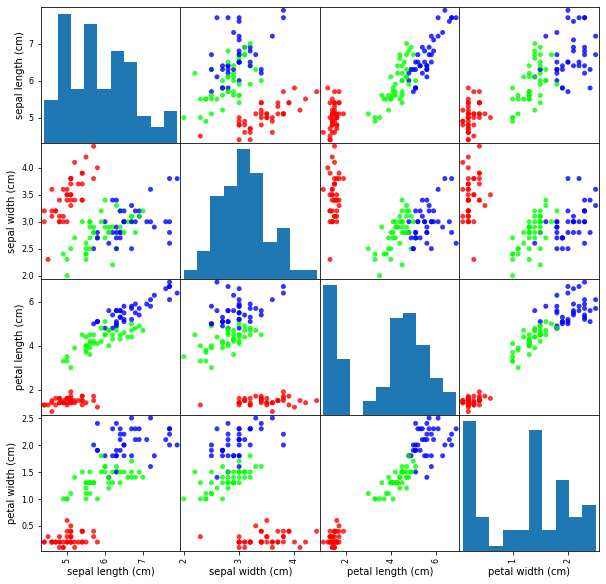

In [5]:
#Train data 시각화 
pd.plotting.scatter_matrix(iris_df, c=y_train, s=100, alpha=0.8, figsize=[10,10])

# 5. BP 알고리즘을 이용한 MLP 구현

In [6]:
#Sigmoid Function
def sigmoid(x):
    return 1/(1+np.exp(-x))

#Sigmoid Function 미분
def sigmoid_deriv(x):
    return x*(1-x)

#Input, Hidden, Output Node
inputs, hiddens, outputs = 4, 5, 3
epochs = 50 #Epoch 50
lr = 0.01 #learning rate = 0.01

#weight, bias initialization
#weight는 Xavier Initialization 방법 이용 
w1_range = (6 / (inputs + hiddens))**0.5   #w1에 대한 값 범위 
w2_range = (6 / (hiddens + outputs))**0.5  #w2에 대한 값 범위 

#weight W1, W2 초기화 
W1 = np.random.uniform(-w1_range, w1_range, size=(inputs, hiddens))
W2 = np.random.uniform(-w2_range, w2_range, size=(hiddens, outputs))

#bias는 B1, B2 모두 0으로 초기화 
B1 = np.zeros(shape=(1, hiddens)) 
B2 = np.zeros(shape=(1, outputs))

#분류 성능 (정확도)
def accuracy(real, pred):
    tf = real.argmax(axis=0) == pred.argmax(axis=0)
    return tf.mean()

#Feedforward Propagation
def forward(x):
    input_layer = x #input layer
    z1 = np.dot(input_layer, W1) + B1   #행렬 곱 계산
    hidden_layer = sigmoid(z1)          #활성화 함수를 적용하여 hidden_layer 구함 
    z2 = np.dot(hidden_layer, W2) + B2  #행렬 곱 계산 
    output_layer = sigmoid(z2)          #활성화 함수를 적용하여 output_layer 구함 

    return input_layer, hidden_layer, output_layer

#BackPropagation 
def train():
    global W1, W2, B1, B2

    for epoch in range(epochs): #주어진 epoch만큼 train
        for x, y in zip(X_train, y_train):
            #2차원 행렬로 변환 
            x = np.reshape(x, (1, -1))
            y = np.reshape(y, (1, -1))
            
            input_layer, hidden_layer, output_layer = forward(x)      #feedforward 계산 
            output_error = output_layer - y                           #error 계산
            output_delta = output_error * sigmoid_deriv(output_layer) #output layer의 delta 계산 

            hidden_error = np.dot(output_delta, W2.T)                 #hidden layer의 error 계산 
            hidden_delta = hidden_error * sigmoid_deriv(hidden_layer) #hidden layer의 delta 계산

            W2 += -lr * np.dot(hidden_layer.T, output_delta)          #delta에 출력값을 곱함 (loss function을 weight로 미분한 값 계산)
            W1 += -lr * np.dot(input_layer.T, hidden_delta)
            B2 += -lr * np.sum(output_delta, axis=0)                  #bias의 입력은 항상 1로 가정
            B1 += -lr * np.sum(hidden_delta, axis=0)
        
        #해당 epoch에서의 weight, bias 출력 
        print('Epoch %d/%d' %(epoch, epochs-1))
        print('W1\n', W1)
        print('\nW2\n', W2)
        print('\nB1\n', B1)
        print('\nB2\n', B2,)
        print('------------------------------------------------------------------------------------------')

#Test Function 
def test():
    accuracy_list = [] #분류 결과의 true, false 리스트

    for idx, (x, y) in enumerate(zip(X_test, y_test)):
        x = np.reshape(x, (1, -1))
        input_layer, hidden_layer, output_layer = forward(x)         #해당 test data에 대해 y값 예측 
        output_layer = np.squeeze(output_layer)                      #보기 좋게 필요없는 차원 제거 
        tf = accuracy(y, output_layer)                               #예측한 분류가 맞는지 확인 
        accuracy_list.append(tf)                                     #예측한 분류가 맞으면 1, 아니면 0 -> 리스트에 추가 
        print('Test Data %.2d: ' %idx, x, y, output_layer, bool(tf)) #해당 데이터에 대한 예측값 출력 
    
    result_accuracy = sum(accuracy_list) / len(accuracy_list)        #모든 test data에 대한 분류 정확도 계산 
    print('\nTest data에 대한 분류 정확도: %.2f%%' %(result_accuracy*100)) #분류 정확도 출력 

# 6. Train

In [7]:
train()

Epoch 0/49
W1
 [[-0.09855414  0.42519135 -0.81213399  0.37520381 -0.08644384]
 [-0.05460005 -0.60824186 -0.20541337 -0.79096039 -0.71560887]
 [ 0.75396824 -0.50612796 -0.81155283 -0.41945903  0.32909196]
 [-0.50474411  0.52887371  0.81082216  0.11677064  0.47279429]]

W2
 [[-0.46247724 -0.32645636  0.57479168]
 [ 0.80665835  0.24376183 -0.26189911]
 [ 0.33695404  0.50088519 -0.8312501 ]
 [ 0.79287974 -0.00775817 -0.74815446]
 [ 0.60664306  0.44194765 -0.55399316]]

B1
 [[-0.00487369 -0.01400629  0.00010749 -0.0004596  -0.01152111]]

B2
 [[-0.07428947 -0.04669138 -0.05213549]]
------------------------------------------------------------------------------------------
Epoch 1/49
W1
 [[-0.12473111  0.37925087 -0.81152096  0.3827695  -0.16015925]
 [-0.07728932 -0.61841303 -0.2050086  -0.77336115 -0.74510108]
 [ 0.758136   -0.56638949 -0.81135215 -0.44504902  0.25799557]
 [-0.49984065  0.50486987  0.81085847  0.10420392  0.44526888]]

W2
 [[-0.52226986 -0.34330292  0.54395505]
 [ 0.79565796 

# 7. Test

In [8]:
test()

Test Data 00:  [[6.  2.2 5.  1.5]] [0 0 1] [0.12859493 0.41731838 0.50562337] True
Test Data 01:  [[6.7 3.3 5.7 2.1]] [0 0 1] [0.11708437 0.42242147 0.52965176] True
Test Data 02:  [[4.3 3.  1.1 0.1]] [1 0 0] [0.78744067 0.27775988 0.09942125] True
Test Data 03:  [[6.1 3.  4.9 1.8]] [0 0 1] [0.14182092 0.41260121 0.4909533 ] True
Test Data 04:  [[6.6 2.9 4.6 1.3]] [0 1 0] [0.19528905 0.38906481 0.41645863] False
Test Data 05:  [[6.3 3.3 6.  2.5]] [0 0 1] [0.10470972 0.42948005 0.55198174] True
Test Data 06:  [[5.8 2.7 3.9 1.2]] [0 1 0] [0.24652618 0.37720057 0.36824869] True
Test Data 07:  [[4.9 3.1 1.5 0.2]] [1 0 0] [0.77456429 0.27890918 0.10380432] True
Test Data 08:  [[4.9 2.5 4.5 1.7]] [0 0 1] [0.12945868 0.42126395 0.50931934] True
Test Data 09:  [[6.9 3.1 5.1 2.3]] [0 0 1] [0.1573275  0.40673365 0.47048613] True
Test Data 10:  [[7.2 3.2 6.  1.8]] [0 0 1] [0.11437007 0.42193333 0.53190023] True
Test Data 11:  [[5.  3.4 1.5 0.2]] [1 0 0] [0.78426963 0.27702185 0.10086035] True
Tes